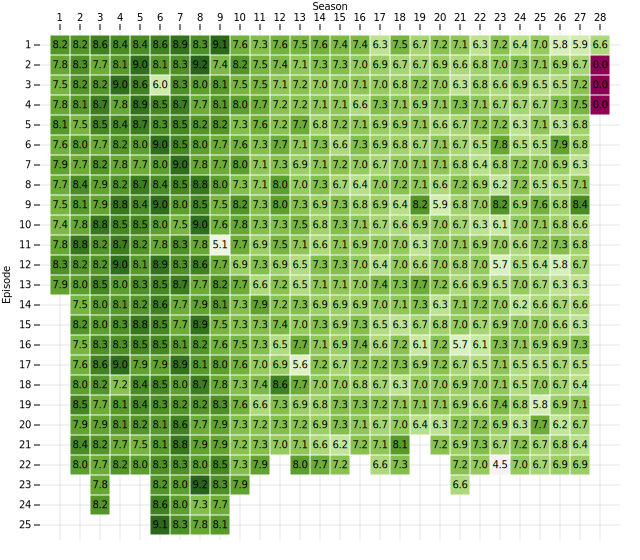

In [36]:
// @deno-types="npm:@types/d3@7.4.3"
import * as d3 from "npm:d3@7.4.3";
import * as Plot from "npm:@observablehq/plot";
import { DOMParser } from "npm:linkedom";

const csvText = await Deno.readTextFile("simpsons.csv");
const simpsons = await d3.csvParse(csvText, (row ) => {
    return {
        number_in_season: +row.number_in_season,
        season: +row.season,
        title: row.title,
        imdb_rating: +row.imdb_rating,
        us_viewers_in_millions: +row.us_viewers_in_millions,
    }
});

const document = new DOMParser().parseFromString(
  `<!DOCTYPE html><html lang="en"></html>`,
  "text/html",
);
Plot.plot({
    padding: 0,
    grid: true,
    x: {axis: "top", label: "Season"},
    y: {label: "Episode"},
    color: {type: "linear", scheme: "PiYG"},
    style: {
        background: "none",
    },
    marks: [
      Plot.cell(simpsons, {x: "season", y: "number_in_season", fill: "imdb_rating", inset: 0.5}),
      Plot.text(simpsons, {x: "season", y: "number_in_season", text: (d) => d.imdb_rating?.toFixed(1), fill: "black", title: "title"})
    ],
    document
  })